# Implementation of Machine Learning Models on EMNIST Dataset with Hyperparameter Variations

## Importing Libraries

In [1]:
# General imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Models
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical



### Load and Preprocess the EMNIST Dataset

Data preprocessing completed!
Size of the dataset: 279998
Number of elements in the training set: 239999
Number of elements in the test set: 39999


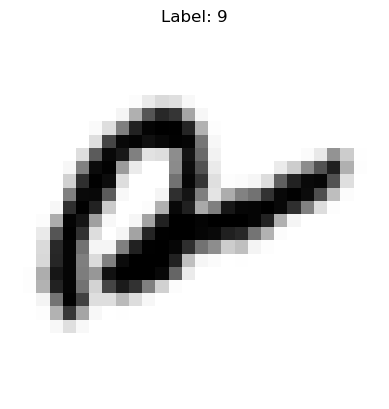

In [2]:
# Load the CSV files
train_data = pd.read_csv('emnist-digits-train.csv')
test_data = pd.read_csv('emnist-digits-test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values  # All columns except the first are features
y_train = train_data.iloc[:, 0].values   # First column is the label
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (if needed)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding for CNN
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

print("Data preprocessing completed!")


# Print dataset information
print("Size of the dataset:", len(X_train) + len(X_test))
print("Number of elements in the training set:", len(X_train))
print("Number of elements in the test set:", len(X_test))

# Visualize a sample image
def plot_sample(index, data_set='train'):
    if data_set == 'train':
        sample = X_train[index]
        label = y_train[index]
    else:
        sample = X_test[index]
        label = "Unknown"  # No label in test set
    
    sample_image = sample.reshape(28, 28)
    plt.imshow(sample_image, cmap="binary")
    plt.axis("off")
    plt.title(f"Label: {label}")
    plt.show()

# Plot sample image (e.g., index 810 from training set)
plot_sample(810)

# 1. K-Nearest Neighbors (K-NN)

In [ ]:
# Implement K-NN with different values of k
for k in [3, 5, 7]:
    print(f"K-NN with k={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.reshape(len(X_train), -1), y_train)
    y_pred_knn = knn.predict(X_test.reshape(len(X_test), -1))
    print(classification_report(y_test, y_pred_knn))
    #Evaluate Confusion Matrix
    knnaccuracy = knn.score(X_test, y_test)
    print(f"Test accuracy: {knnaccuracy:.4f}")
    cm = confusion_matrix(y_test, y_pred_knn)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix(KNN)")
    plt.show()

K-NN with k=3


# 2. Support Vector Machine (SVM)

In [ ]:
# Implement SVM with different values of C
for c in [0.1, 1.0, 10.0]:
    print(f"SVM with C={c}")
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train.reshape(len(X_train), -1), y_train)
    y_pred_svm = svm.predict(X_test.reshape(len(X_test), -1))
    print(classification_report(y_test, y_pred_svm))
    #Evaluate Confusion Matrix
    svmaccuracy = accuracy_score(y_test, y_pred_svm)
    print(f"Test accuracy: {svmaccuracy:.4f}")

    cm = confusion_matrix(y_test, y_pred_svm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix(SVM)")
    plt.show()


# 3. Logistic Regression

In [ ]:
# Implement Logistic Regression with different solvers
for solver in ['lbfgs', 'saga', 'liblinear']:
    print(f"Logistic Regression with solver={solver}")
    log_reg = LogisticRegression(max_iter=200, solver=solver)
    log_reg.fit(X_train.reshape(len(X_train), -1), y_train)
    y_pred_log_reg = log_reg.predict(X_test.reshape(len(X_test), -1))
    print(classification_report(y_test, y_pred_log_reg))
    #Evaluate Confusion Matrix
    logregaccuracy = logreg.score(X_test, y_test)
    print(f"Logistic Regression Test Accuracy: {logregaccuracy:.4f}")

    cm_logreg = confusion_matrix(y_test, y_pred_log_reg)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix (Logistic Regression)")
    plt.show()

# 4. Decision Tree

In [ ]:
# Implement Decision Tree with different depths
for depth in [5, 10, 20]:
    print(f"Decision Tree with max_depth={depth}")
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train.reshape(len(X_train), -1), y_train)
    y_pred_tree = decision_tree.predict(X_test.reshape(len(X_test), -1))
    print(classification_report(y_test, y_pred_tree))
    # Evaluate Confusion Matrix
    dtaccuracy = dt_classifier.score(x_test, y_pred_tree)
    print(f"Test accuracy: {dtaccuracy:.4f}")

    cm = confusion_matrix(y_test, y_pred_tree)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for Decision Tree")
    plt.show()

# 5. Convolutional Neural Network (CNN)

In [ ]:
# Implement CNN with different configurations
for dropout_rate in [0.25, 0.5]:
    for epochs in [5, 10]:
        print(f"CNN with dropout_rate={dropout_rate}, epochs={epochs}")
        cnn_model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Dropout(dropout_rate),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(dropout_rate),
            Dense(10, activation='softmax')
        ])
        
        cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        cnn_model.fit(X_train_cnn, y_train_cnn, epochs=epochs, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))
        cnn_model.evaluate(X_test_cnn, y_test_cnn)
        # Evaluate
        loss, cnnaccuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose = 0)
        print(f"Test loss: {loss:.4f}")
        print(f"Test accuracy: {cnnaccuracy:.4f}")
        y_pred = np.argmax(cnn_model.predict(x_test), axis=1)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix(CNN)")
        plt.show()
